In [1]:
# import logging
# class FilterModule(logging.Filter):
#     def __init__(self, modulename=""):
#         self.modulename = modulename
#     def filter(self, rec):
#         return not rec.name.startswith(self.modulename)

# logging.basicConfig(format='[%(asctime)s][%(levelname)s][%(name)s] %(message)s', level=logging.DEBUG)
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# for handler in logger.handlers:
#     handler.addFilter(FilterModule("numba"))
#     handler.addFilter(FilterModule("matplotlib"))    

In [3]:
import ebisim as eb
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
# os.environ["NUMBA_DISABLE_INTEL_SVML"] = "1"
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 100
# eb.simulation._advanced.compile_adv_model()

print(os.environ.get("NUMBA_DISABLE_INTEL_SVML", "Not set"))
# ?eb.Device.get

Not set


4000652.037804129
5000.815047255161
14.632420325607171


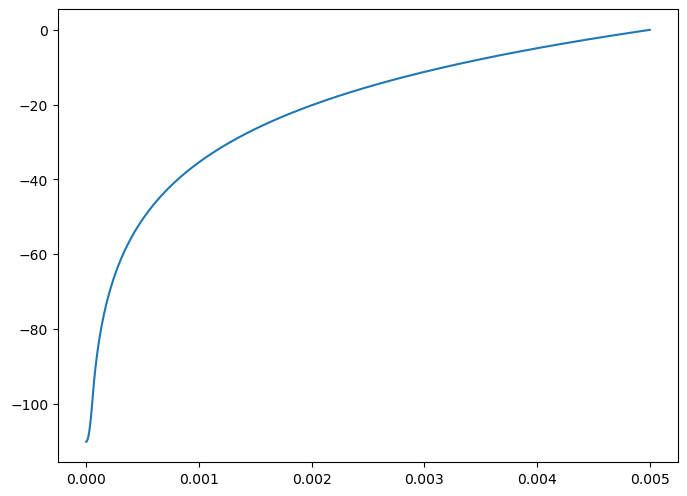

In [4]:
Ar = eb.Target.get_gas("Ar", 1.657e-10, 5e-3)
Xe = eb.Target.get_gas("Xe", 5/4*1.657e-13, 5e-3)

dev = eb.Device.get(current=.05, e_kin=5000, r_e=55e-6, length=5e-3, v_ax=-10, b_ax=2.5, r_dt=0.005, n_grid=350, r_dt_bar=1.5e-3)
dev = eb.Device.get(current=.05, e_kin=5000, r_e=55e-6, length=5e-3, v_ax=-12, b_ax=2.5, r_dt=0.005, n_grid=350, r_dt_bar=1.5e-3)

print(Ar.n[0] / 3.1415/0.005**2/1e6)
print(Xe.n[0] / 3.1415/0.005**2/1e6)
plt.figure()
plt.plot(dev.rad_grid, dev.rad_phi_uncomp)
print(dev.v_ax+dev.v_ax_sc-dev.rad_phi_uncomp[0])
# print(repr(dev))

In [5]:
TMAX = 8
# T0 = 0.0001
ares, xres = eb.advanced_simulation(
    dev, [Ar, Xe],TMAX,
    options=eb.ModelOptions(RADIAL_DYNAMICS=True, IONISATION_HEATING=True),#, HEAT_CAPACITY=True),
    solver_kwargs={"method":"Radau","dense_output":False, "max_step":.1,},
    rates=True, n_threads=4
)

Initial temperature vector adjusted for Element: Argon (Ar, Z = 18, A = 40). This only affects charge states with densities at the minimum limit.
Initial temperature vector adjusted for Element: Xenon (Xe, Z = 54, A = 132). This only affects charge states with densities at the minimum limit.



 Integration: 112579 calls, t = 7.6784e-04 s

KeyboardInterrupt: 

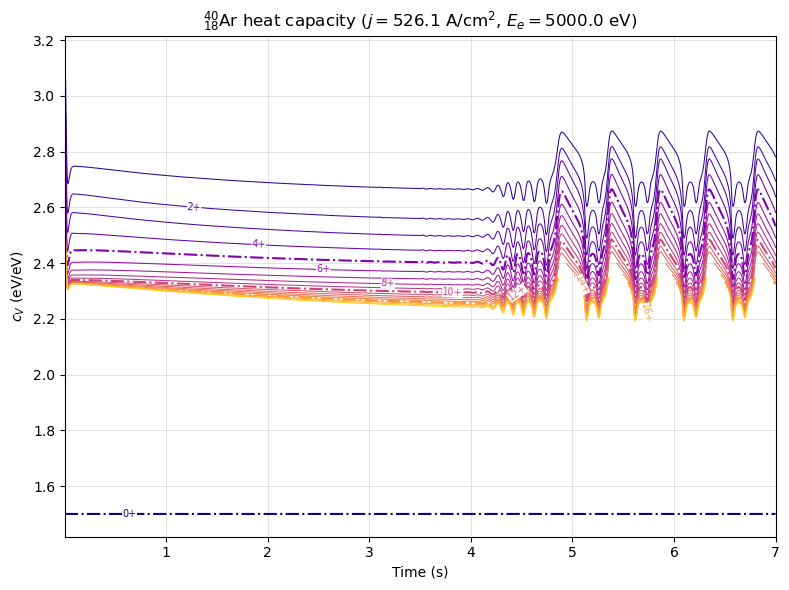

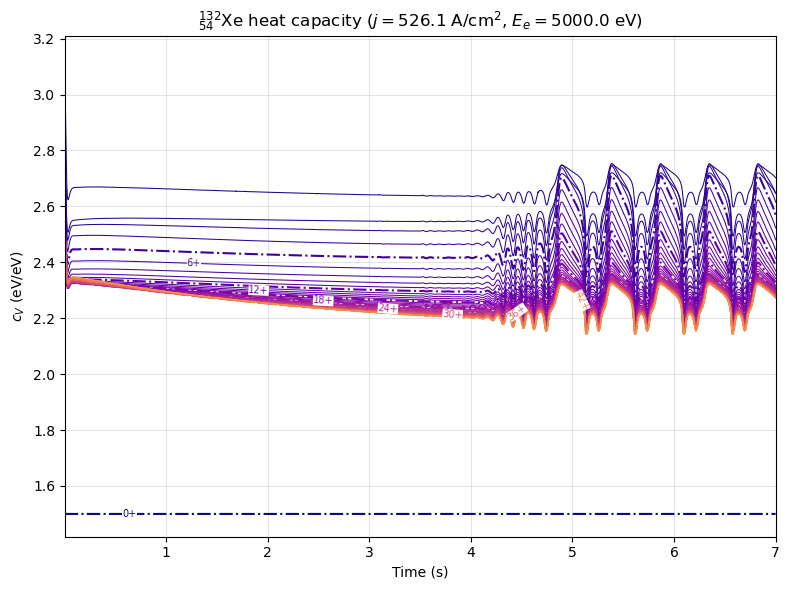

In [9]:
ares.plot_rate(eb.Rate.CV, xscale="linear");
xres.plot_rate(eb.Rate.CV, xscale="linear");

False
False
False
False


2284

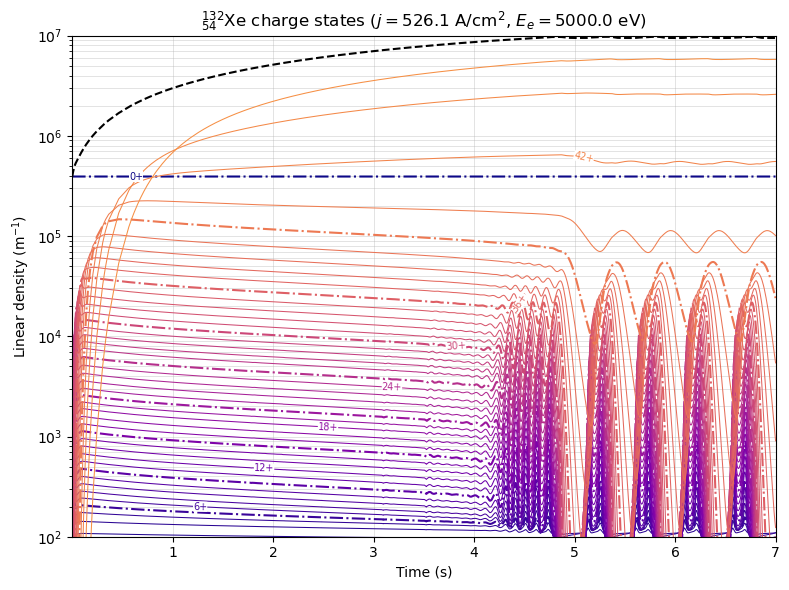

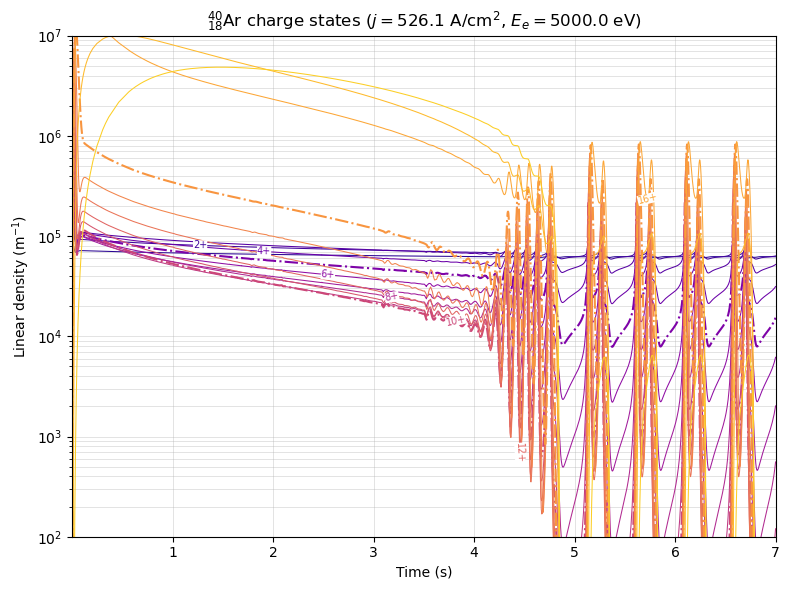

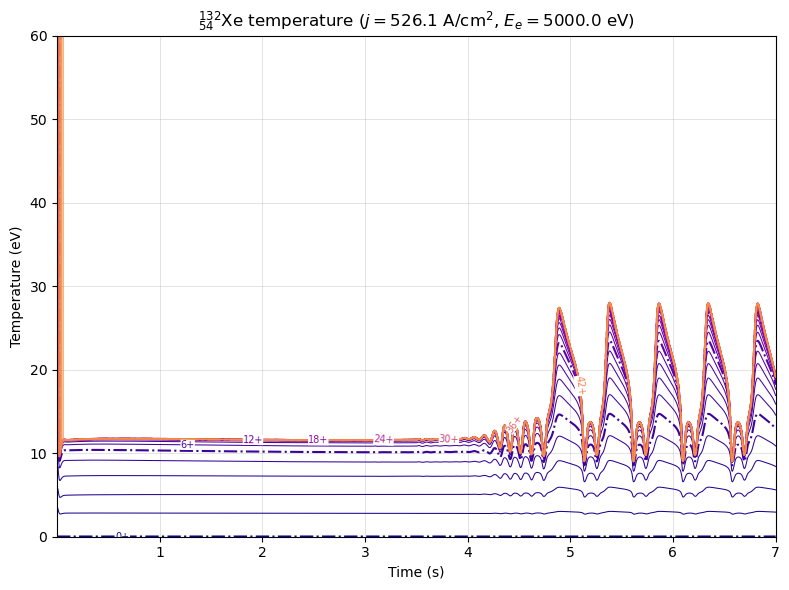

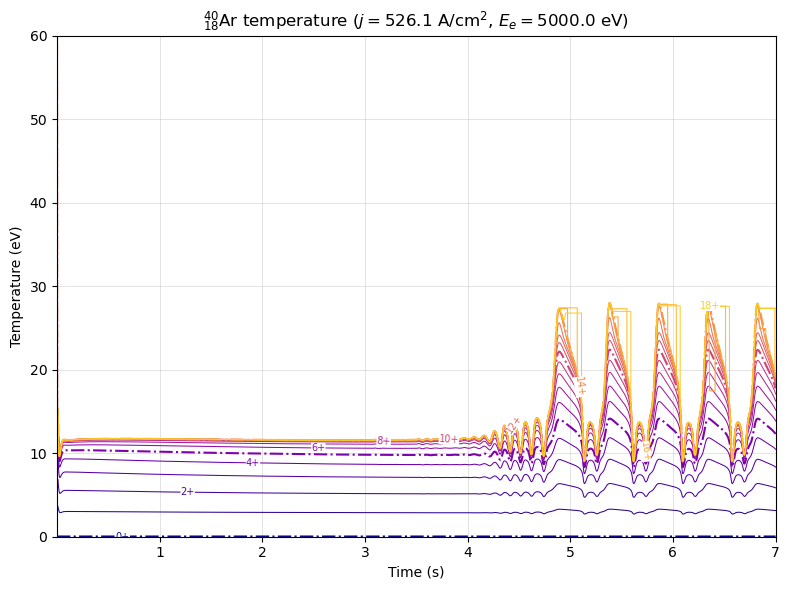

In [10]:
xres.plot(xscale="linear", yscale="log", ylim=(1e2,1e7))
ares.plot(xscale="linear", yscale="log", ylim=(1e2,1e7))

# xres.plot(xscale="log", yscale="log", ylim=(1e-15,1e6))
xres.plot_temperature(xscale="linear", yscale="linear", ylim=(0,60), dens_threshold=-30)
_ = ares.plot_temperature(xscale="linear", yscale="linear", ylim=(0,60), dens_threshold=-30)

# ares.plot(xscale="linear", yscale="log")#, ylim=(10,1e14))
# _=ares.plot_temperature(xscale="linear", yscale="linear", ylim=(0,60))
print(np.any(xres.N<0))
print(np.any(ares.N<0))
print(np.any(xres.kbT<0))
print(np.any(ares.kbT<0))
np.argmin(ares.kbT)-18922*(np.argmin(ares.kbT)//18922)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8b5dc223d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b39bdda10>)

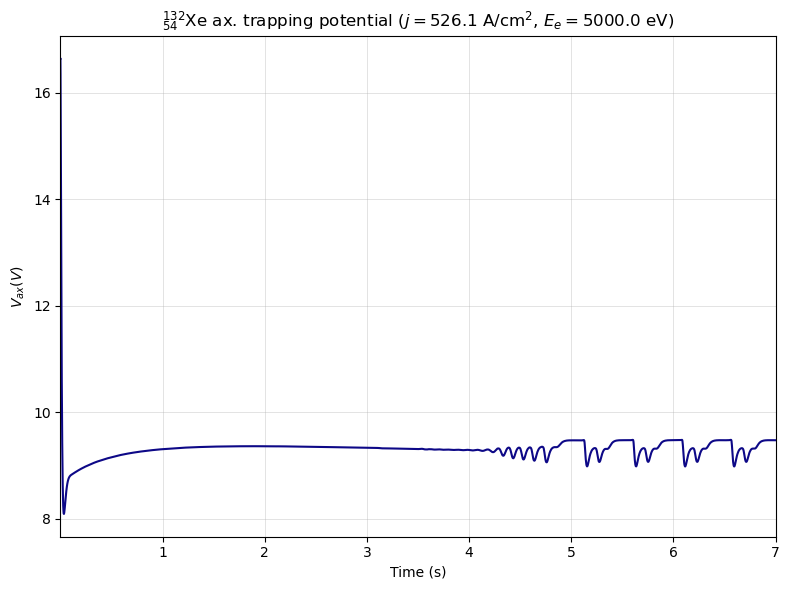

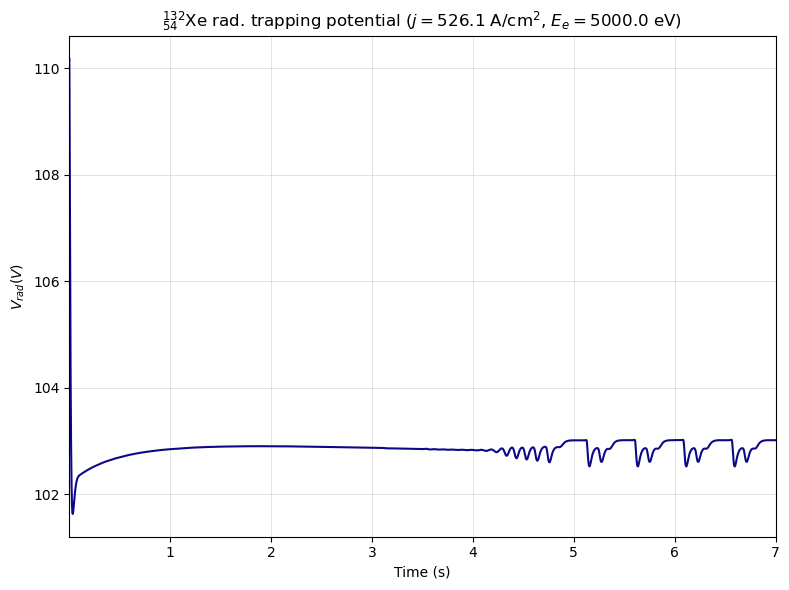

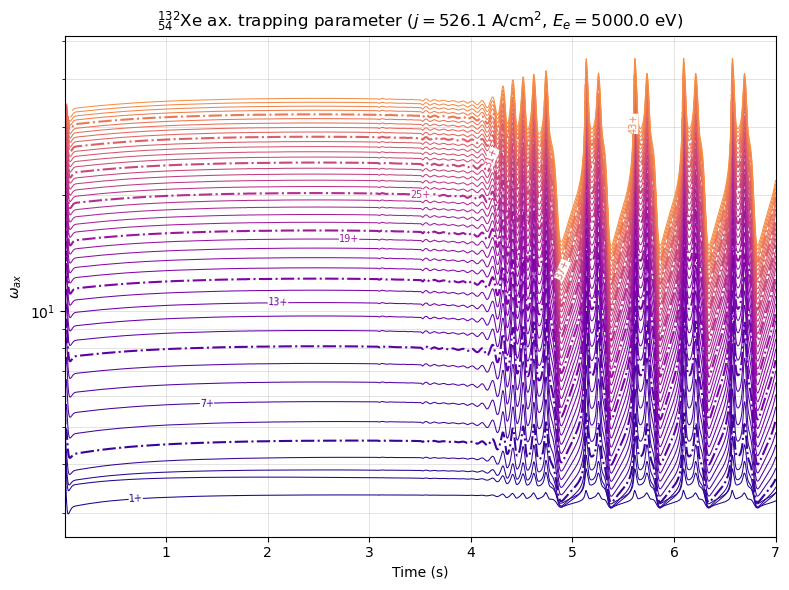

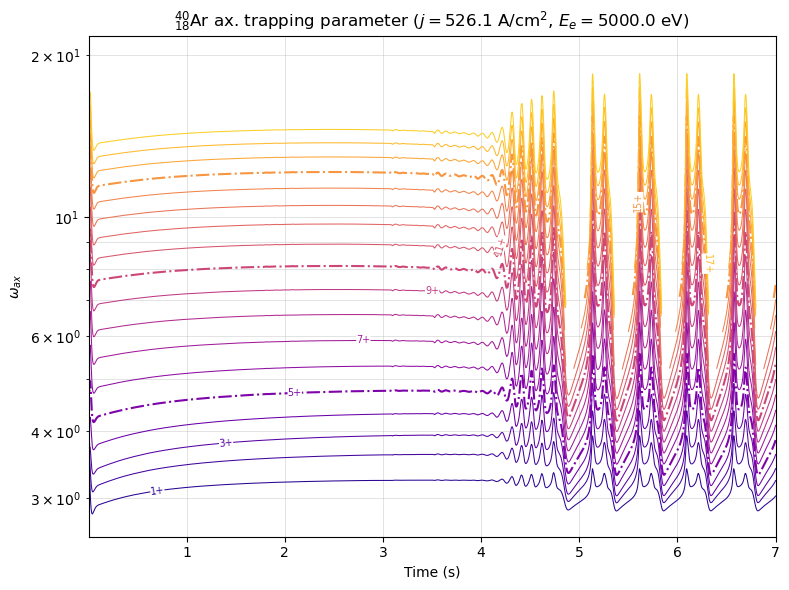

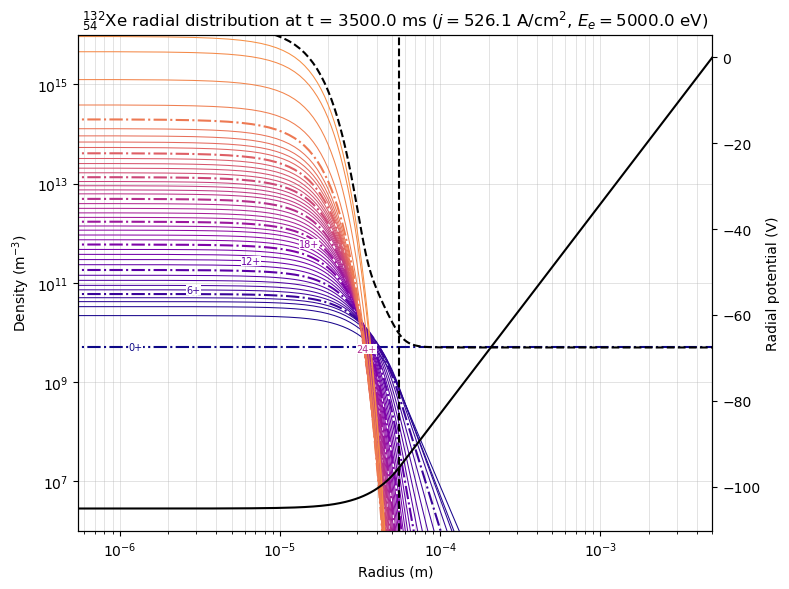

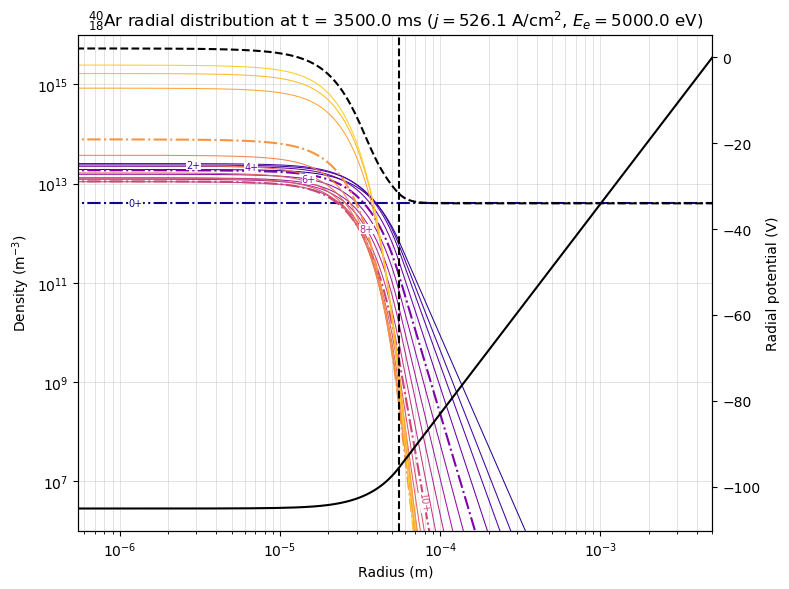

In [11]:
xres.plot_rate(eb.Rate.V_AX, xscale="linear")
xres.plot_rate(eb.Rate.V_RA, xscale="linear")
xres.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, xscale="linear", yscale="log")
ares.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, xscale="linear", yscale="log")

# xres.plot_rate(eb.Rate.COLLISION_RATE_SELF)
# xres.plot_rate(eb.Rate.COLLISION_RATE_TOTAL)
xres.plot_radial_distribution_at_time(3.5)
ares.plot_radial_distribution_at_time(3.5)

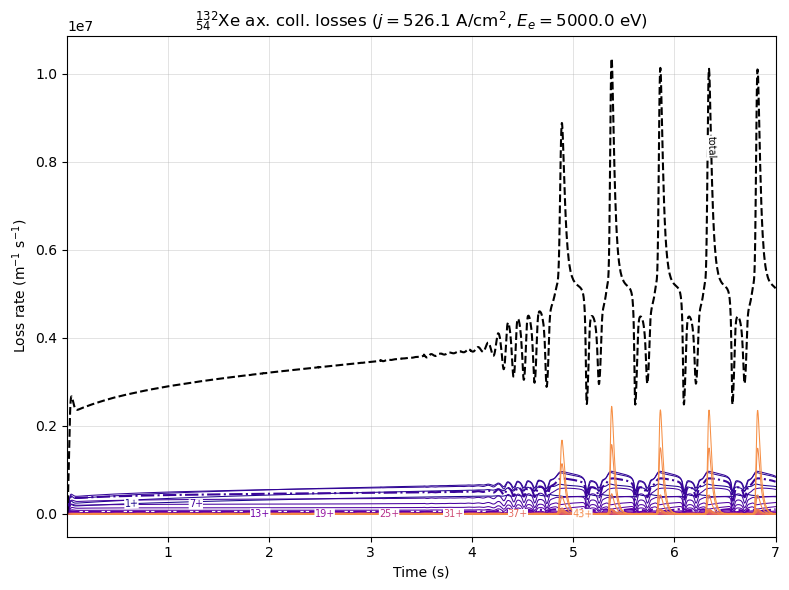

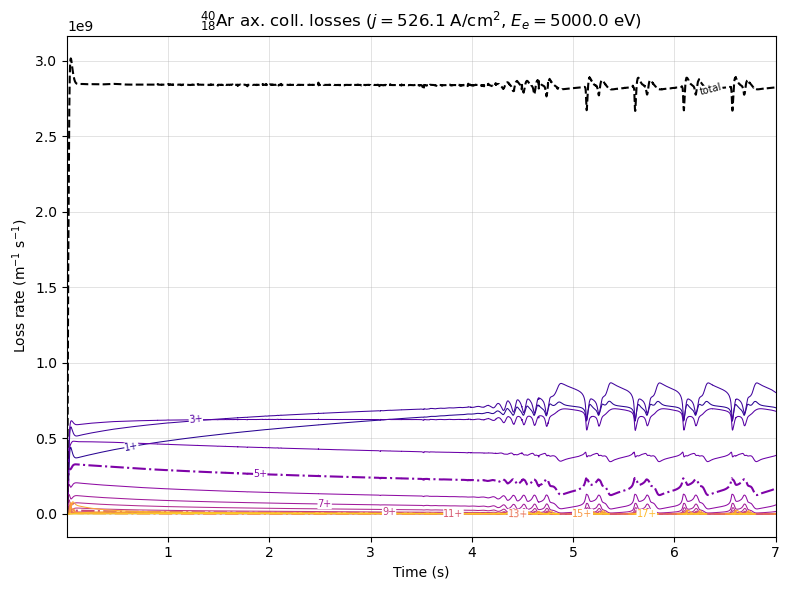

In [12]:
xres.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL, xscale="linear", plot_total=True)
_=ares.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL, xscale="linear", plot_total=True)




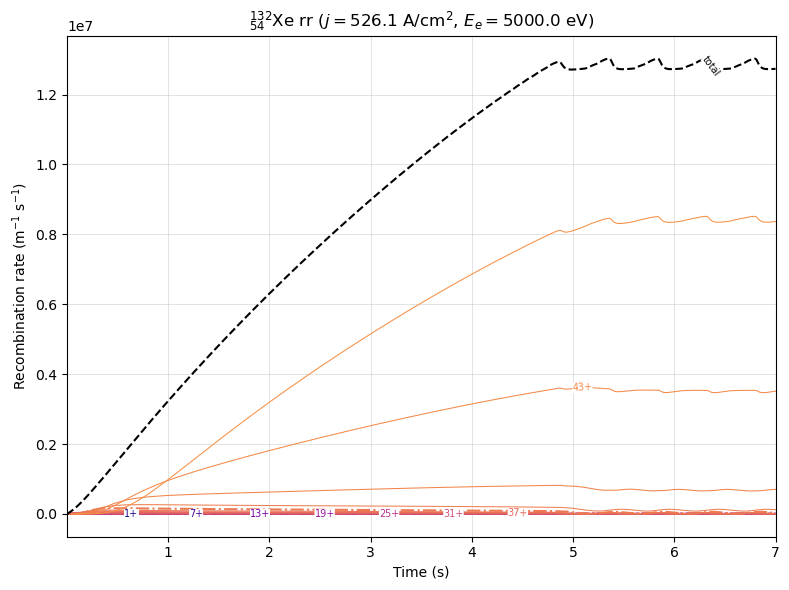

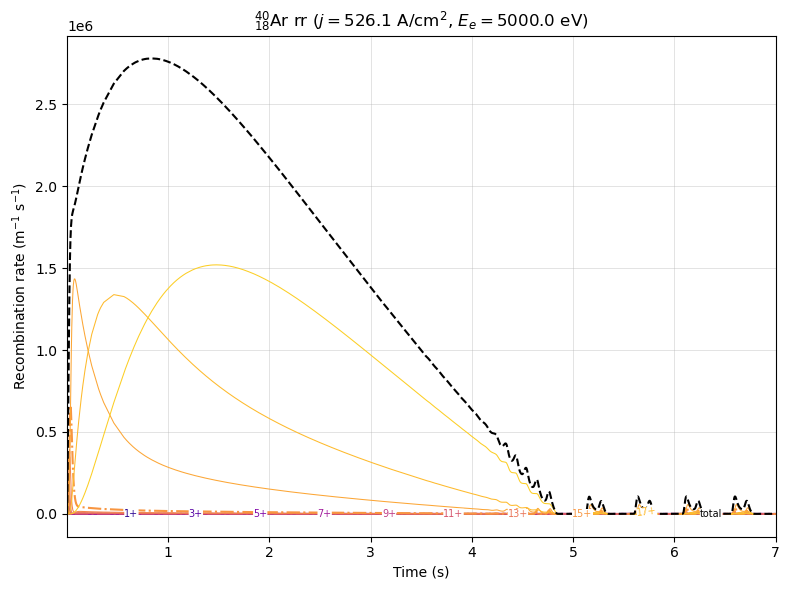

In [13]:
xres.plot_rate(eb.Rate.RR, xscale="linear", plot_total=True)
_=ares.plot_rate(eb.Rate.RR, xscale="linear", plot_total=True)

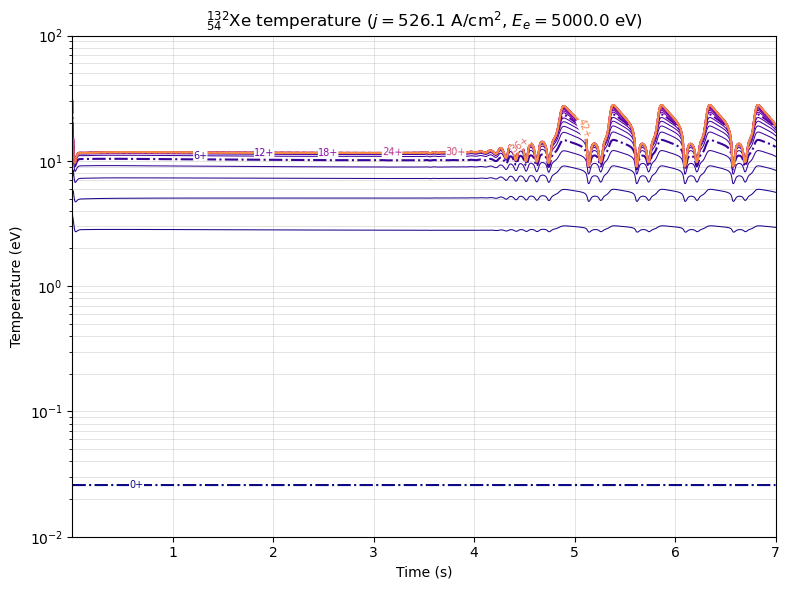

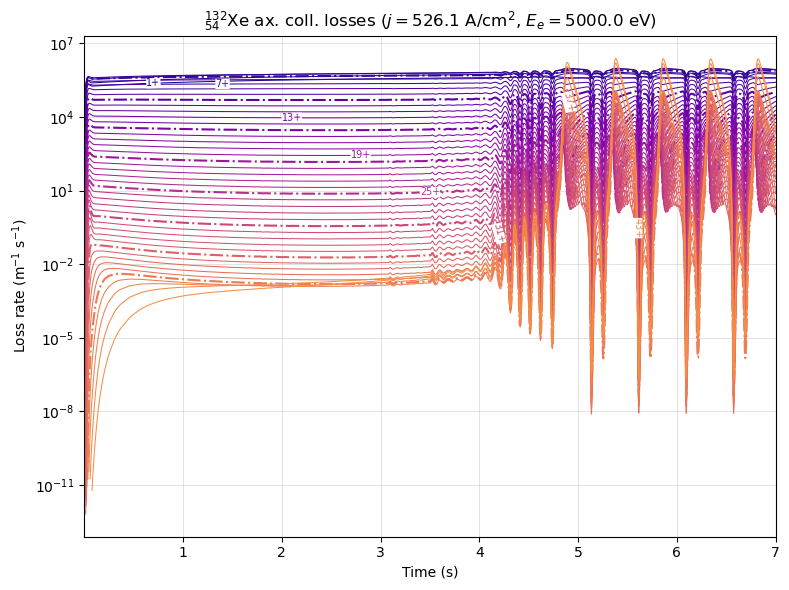

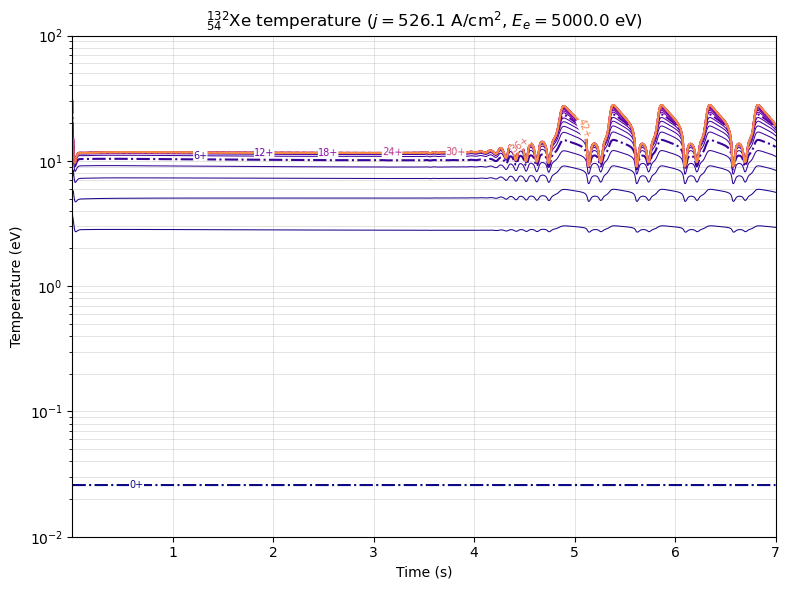

In [14]:
xres.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL, xscale="linear", yscale="log", plot_total=False)
xres.plot_temperature(yscale="log", xscale="linear")